<img src="ml2_group_assignment.png" width="800"/>

# <font color=green> Introduction </font>

This is a continuation of forest_cover_type_detector_gr_a_Part2.

Above we import the files created in the previous notebook so that this notebook can run independently

Table of contents is an extension of the previous notebook

<img src="tree_types.png" width="800"/>

# <font color=green> Table of contents </font>

* [Libaries used](#0)
* [1. Import Data](#1)
  * [1.1.Original Data & Standardization](#1.1)
  * [1.2.All features & Standardization](#1.2)  
  * [1.3.Features selected & Standardization](#1.3)   
  
* [2.__Rerun the model on selected Features__](#2)  
  * [2.1.Correlation Heatmap](#2.1)
      * [2.1.1 Removing correlated features](#2.1.1)
      
* [__7. ML Algorithms after feature selection__](#7)
  * [7.1 Decision Trees](#7.1)
      * [7.1.1 Single Tree](#7.1.1)
  * [7.2 XGBoost](#7.2)  
  * [7.3 Extra Tree Classifier](#7.3)
  * [7.4 Random Forest](#7.4)    
      * [7.4.1 Bagging](#7.1.1)  
  * [7.5 KNN](#7.5)
  * [7.6 SVM](#7.6)
  * [7.7 Naive Bayes](#7.7)
  * [7.8 Logistic Regression](#7.8)
  * [7.9 Ensemble Methods](#7.4)
  
  
* [__8. ML Algorithms after Dimensionality Reduction__](#8)
  * [8.1 PCA Dimensionality reduction ](#8.1)
      * [8.1.1 Random Forest](#8.1.1)
      * [8.1.2 XGBoost](#8.1.2)      
      * [8.1.3 Logistic Regression](#8.1.3)     
      * [8.1.4 Extra Tree Classifier](#8.1.4)
      * [8.1.5 Ensemble Methods](#8.1.5)      
  * [8.2 LDA Dimensionality reduction ](#8.2)      
  
* [9. Final Submission](#9)

<img src="roosevelt-national-forest.jpeg" width=1200 height=800 align="center">

<a id='0'></a>
# <font color=green> Libraries used </font>

In [1]:
#!pip install squarify
#!pip install GraphViz
#pip install pygraphviz
#!pip install pydotplus
#!pip install xgboost
#!pip install dtreeviz

In [2]:
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import plotly.express as px

import pydotplus
import xgboost as xgb
import matplotlib
import squarify


In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, ShuffleSplit
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import BernoulliNB #BernoulliNB is designed for binary/boolean features
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

from dtreeviz.trees import *

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier 
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import metrics
from sklearn import svm
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.decomposition import PCA

from sklearn.svm import SVC

from sklearn.compose import make_column_transformer

from sklearn.manifold import TSNE

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

from sklearn.tree import export_graphviz

from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.manifold import TSNE

from IPython.display import Image  
from IPython.core.display import display, HTML
from IPython.display import Image  

from scipy.stats import uniform, randint
from scipy.stats import uniform, randint

from xgboost import XGBClassifier

from io import StringIO

from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.style.palettes import PALETTES, SEQUENCES, color_palette

warnings.simplefilter(action='ignore', category=FutureWarning)
display(HTML("<style>.container { width:100% !important; }</style>")) # Increase cell width
display(HTML("<style>.rendered_html { font-size: 16px; }</style>")) # Increase font size

/var/folders/ks/5bc1x9p158vgc4774v7r2tq40000gn/T/ipykernel_5697/627927963.py:66: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



<a id='1'></a>
#  <font color=darkgreen>1.Import the Data </font>
<a id='1.1'></a>
###  <font color=green>1.1. Original Data </font>
Let’s load the previous data and results from previous notebook 2

In [ ]:
data_train = pd.read_csv("train.csv")

In [ ]:
data_test = pd.read_csv("test.csv")
pd.set_option('display.max_columns', None)

In [ ]:
data_test.shape

In [ ]:
column_list = data_train.columns
num  = [column for column in column_list if 'Soil' not in column and 'Wilderness_Area' not in  column and 'Aspect_North' not in  column and 'Climate' not in  column and 'Family' not in  column and 'Type' not in  column and 'complex' not in  column and 'Aspect_East' not in  column and 'Aspect_South' not in  column and 'Aspect_West' not in  column ]
cat= [column for column in column_list if column not in num]

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
scaler = StandardScaler()

<a id='1.2'></a>
## <font color=green> 1.2.All features & Standardization  <font>
 
Due to excel import, it transforms a new column unnamed

From 55 features, we engineered a total of 165 additional ones

For scaling we need to exclude the dummy variables 

<a id='1.3'></a>
##  <font color=green>1.3. Selected Model after Feature Selection & Standardization </font>


Selected features from the feature selection are transferred to cvs and used for further analysis. 

In [4]:
X_selected1 = pd.read_csv("X_selected.csv")
y_selected1 = pd.read_csv("y_selected.csv")

In [5]:
X_selected1 = X_selected1[X_selected1.columns.drop(list(X_selected1.filter(regex='Unnamed:')))]
y_selected1 = y_selected1[y_selected1.columns.drop(list(y_selected1.filter(regex='Unnamed:')))]

In [6]:
print(X_selected1.shape)
print(y_selected1.shape)

if X_selected1.shape[0] != y_selected1.shape[0]:
  print("X and y rows are mismatched, check dataset again")

(15120, 33)
(15120, 1)


We need to filter out the dummy variables for the normalization 

In [7]:
column_list = X_selected1.columns
scale_numerical  = [column for column in column_list if 'Soil' not in column and 'Wilderness_Area' not in  column and 'Aspect_North' not in  column and 'Climate' not in  column and 'Family' not in  column and 'Type' not in  column and 'complex' not in  column and 'Aspect_East' not in  column and 'Aspect_South' not in  column and 'Aspect_West' not in  column ]
scale_categorial= [column for column in column_list if column not in scale_numerical ]

In [8]:

#scaler = MinMaxScaler()

scaler = StandardScaler()

Splitting the data into train and validation test 

In [9]:
column_list = X_selected1.columns

X_train_new, X_val_new, y_train_new, y_val_new = train_test_split(X_selected1, y_selected1, test_size=0.20, random_state=37,stratify=y_selected1)
print("The shape of validation data:{} and {} ".format(X_val_new.shape,y_val_new.shape))
print("The shape of training data:{} and {} ".format(X_train_new.shape,y_train_new.shape))
y_val_new = y_val_new.values.ravel()
y_train_new = y_train_new.values.ravel()

The shape of validation data:(3024, 33) and (3024, 1) 
The shape of training data:(12096, 33) and (12096, 1) 


<a id='2'></a>
# <font color=darkgreen> 2.Re-run models with the new selected features  <font>
Some classes such as SDG classifier , Random Forest classifier and naive Bayes classifier can handle mutliple classes naively. 
    
Others like logistic regression or Support Vector Machine classifier are stricly binary classifier. However there are various strategies to perform multiclass classification with multiple binary classifiers. 

In [ ]:
# Create a dataFrame to compare performance of Classifier Models in the End
classifiers_compare = pd.DataFrame(columns =['Algorithm','Mean CV Score'])

<a id='2.1'></a>
## <font color=green> 2.1 Correlation Heatmap  <font>
Checking Correlation among features

In [ ]:
#Heatmap - Checking for autocorrelation among variables 
matrix = X_selected1.corr()
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(50,20))
heatmap = sns.heatmap(matrix, center=0, fmt=".3f", square=True, annot=True, linewidth=1.3, mask = mask,vmax=0.9);
plt.show()

<a id='2.1.1'></a>
## <font color=green> 2.1.1 Removing autocorrelation <font>

Some of these features are heavily correlated one another, before running the models like Logistic Regression, where mutlicorrelaty is an issue, we should ensure, only relevant features are considered, taking a threshold of 0.7 these are:

- Wilderness Area 1 
- Subalpine Climate (synthetic)
- Wilderness Area 3
- Elevation
- Family Moran (synthetic)
- Soil Type 3
- Soil Type 12
- Rock outcrop complex (synthetic)
- Lower Montane Climate (synthetic)
- Family Catamount (synthetic)

TOTAL: 11 features

This is for logistic regression, Stephanie will decide if we keep it or not eventually

In [ ]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)
    print('Removed Columns {}'.format(drops))
    return x

Removing Collinearity features for logistic regression. 

In [ ]:
df_logist = remove_collinear_features(X_selected1, 0.6)

We make the split

In [ ]:
X_train_log, X_val_log, y_train_log, y_val_log = train_test_split(df_logist, y_selected1, test_size=0.20, random_state=37,stratify=y_selected1)
print("The shape of validation data:{} and {} ".format(X_val_new.shape,y_val_new.shape))
print("The shape of training data:{} and {} ".format(X_train_new.shape,y_train_new.shape))

We define a function to plot the ROC curve later on

In [ ]:
def plot_ROC_curve(model, X_train,y_train, X_val, y_val):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={1: 'Spruce/Fir', 
                                        2: 'Lodgepole Pine', 
                                        3: 'Ponderosa Pine',
                                       4: 'Cottonwood/Willow',
                                       5: 'Aspen',
                                       6: 'Douglas-fir',
                                       7: 'Krummholz'})

                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(X_train,y_train)
    visualizer.score(X_val, y_val)
    visualizer.show()
    
    return visualizer

<a id='7'></a>
# <font color=darkgreen> 7.ML Algorithms before Dimensionality Reduction  <font>

## <font color=green> 7.1. Decision Trees  <font>

A function to plot the trees is defined

In [ ]:
def plot_tree(tree, feature_names):
    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data, feature_names=feature_names, filled=True, rounded=True,special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

<a id='7.1.1'></a>
### <font color=green> 7.1.1. Single Tree <font>

First attempt is with default values

In [ ]:
single_tree = DecisionTreeClassifier(random_state=18)
model_tree = single_tree.fit(X_train_new, y_train_new)
print("Accuracy = {0:.4f}".format(-np.mean(cross_val_score(single_tree, X_train_new, y_train_new, scoring='accuracy'))))

Let's see the tree

In [ ]:
plot_tree(model_tree, X_train_new.columns)

Two aspects can be highlighted after taking a look at the tree:
 - The tree is huge! As we have not set any complexity pruning or max_depth we have allow the tree to grow without any limit
 - Alpine Climate and Binned elevantion seem to be the most important features in order to predict the value of cover type. 

ADAPT THIS SO IT CAN BE A MODEL

Now we prune the tree

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': range(1,30)}

single_tree_a = GridSearchCV(single_tree,
                            param_grid,
                            scoring='accuracy',
                            cv=5, n_jobs=-1, verbose=1)

single_tree_a.fit(X_train_new, y_train_new)

In [ ]:
print("Best parameters set found on development set:")
print()
print(single_tree_a.best_params_)
print()
print("Grid scores on development set:")
print()
means = single_tree_a.cv_results_['mean_test_score']
stds = single_tree_a.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, single_tree_a.cv_results_['params']):
    print("Accuracy = %0.3f (+/-%0.03f) for %r" % (-mean, std * 2, params))

# I stop here, to be continued later

In [ ]:
plt.figure(figsize=(10,10))
plt.errorbar(range(1,30,1), [-m for m in means], yerr=stds, fmt='-o')
plt.title('MSE for different Depths', fontsize=20)
plt.xlabel("Depth", fontsize=16)
plt.ylabel("MSE", fontsize=16);

In [ ]:
single_tree_pruned = DecisionTreeClassifier(random_state=18, max_depth=15)

print("MSE = {0:.4f}".format(-np.mean(cross_val_score(single_tree_pruned, X_train_new, y_train_new, scoring='neg_mean_squared_error'))))
print("Accuracy Train= {0:.4f}".format(np.mean(cross_val_score(single_tree_pruned, X_train_new, y_train_new))))

As can be seen in the plot, the optimal value for the depth of the decision tree is 15. 

In [ ]:
plot_tree(single_tree_pruned.fit(X_train_new,y_train_new), X_train_new.columns)

In [ ]:

dtreeviz(single_tree_pruned, X_train_new,y_train_new, target_name='Cover_Type', feature_names=X_train_new.columns, 
        fontname='DejaVu Sans', scale=1.5,label_fontsize=10, fancy=True)

We ran the same decision tree with tuned hyperparameters

In [ ]:
tree_classifier = DecisionTreeClassifier(random_state=37)
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(tree_classifier, X_train_new, y_train_new))))

In [ ]:
params = {
    "max_depth": randint(12,25), # default 100
    "max_leaf_nodes":[5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

forest_hyper = RandomizedSearchCV(tree_classifier, param_distributions=params, random_state=37, n_iter=150, cv=5, verbose=1, n_jobs=-1, return_train_score=True)
forest_hyper.fit(X_train_new, y_train_new)

In [ ]:
print("Best parameters set found on development set:")
print()
print(forest_hyper.best_params_)
print()
print("Grid scores on development set:")
print()
means = forest_hyper.cv_results_['mean_test_score']
stds = forest_hyper.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, forest_hyper.cv_results_['params']):
    print("Accuracy = %0.3f (+/%0.03f) for %r" % (mean, std * 2, params))

In [ ]:
dt_best= forest_hyper.best_estimator_
dt_best

In [ ]:
tree_classifier = DecisionTreeClassifier(criterion = forest_hyper.best_params_['criterion'], max_depth=forest_hyper.best_params_['max_depth'], max_leaf_nodes= forest_hyper.best_params_['max_leaf_nodes'], random_state=37)

# fit the model with the training data
model_treeclassifer = tree_classifier.fit(X_train_new,y_train_new)

# predict the target on the train dataset
predict_tree = model_treeclassifer.predict(X_train_new)
print('\nTarget on train data',predict_tree)

# Accuracy Score on train dataset
accuracy_tree_train = accuracy_score(y_train_new, predict_tree)
print('\nAccuracy_score on train dataset : ', accuracy_tree_train)

# Predict the target on the test dataset
predict_tree_test = model_treeclassifer.predict(X_val_new)
print('\nTarget on test data',predict_tree_test) 

# Accuracy Score on test dataset
accuracy_tree_test = accuracy_score(y_val_new,predict_tree_test)
print('\nAccuracy on test dataset : ', accuracy_tree_test)

#Best Paramater 
dt_best = forest_hyper.best_estimator_

In [ ]:
score_df = pd.DataFrame(forest_hyper.cv_results_)
score_df.nlargest(3,"mean_test_score")

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_val_new, predict_tree_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 
               'Cottonwood/Willow', 'Aspen', 'Douglas-fir',    
               'Krummholz']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
print(classification_report(y_val_new, predict_tree_test))

In [ ]:
plot_ROC_curve(tree_classifier, X_train_new,y_train_new, X_val_new, y_val_new)

In [ ]:
visualizer = ClassPredictionError(
    tree_classifier)
visualizer.fit(X_train_new, y_train_new)
visualizer.score(X_val_new, y_val_new)
visualizer.show();

<a id='7.2'></a>
## <font color=green> 7.2. XGB Boost  <font>

In [10]:
le = LabelEncoder()
y_train1 = le.fit_transform(y_train_new)
y_val1 = le.fit_transform(y_val_new)

In [11]:
## First run, hyperparameters NEW

In [12]:
xgboost = xgb.XGBClassifier()
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(xgboost, X_train_new, y_train1))))

Accuracy = 0.8567


In [ ]:
params = {
    "max_depth": randint(10,20,2), # default 100
    
    "colsample_bytree": uniform(0.7, 0.85),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "n_estimators": randint(200, 400,50), # default 100
    "subsample": uniform(0.6, 0.95),
    "nthread": [4] # parallel processing and number of cores in the system should be entered.
}


xgb_hyper = RandomizedSearchCV(xgboost, param_distributions=params, random_state=37, n_iter=150, cv=5, verbose=1, n_jobs=-1, return_train_score=True)
xgb_hyper.fit(X_train_new, y_train1)

In [ ]:
print("Best parameters set found on development set:")
print()
print(forest_hyper.best_params_)
print()
print("Grid scores on development set:")
print()
means = forest_hyper.cv_results_['mean_test_score']
stds = forest_hyper.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, forest_hyper.cv_results_['params']):
    print("Accuracy = %0.3f (+/%0.03f) for %r" % (mean, std * 2, params))

Early stopping is an approach to training complex machine learning models to avoid overfitting.

It works by monitoring the performance of the model that is being trained on a separate test dataset and stopping the training procedure once the performance on the test dataset has not improved after a fixed number of training iterations.

It avoids overfitting by attempting to automatically select the inflection point where performance on the test dataset starts to decrease while performance on the training dataset continues to improve as the model starts to overfit.

Source: https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/

In [ ]:
xgboost = xgb.XGBClassifier(criterion = "gini", max_depth = 20, random_state=37, n_jobs=-1)
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(xgboost, X_train_new, y_train1))))
xgboost.fit(X_train_new, y_train1, early_stopping_rounds=40, eval_metric="merror", eval_set=[(X_val_new, y_val1)])
pred = xgboost2.predict(X_val_new)

accuracy = accuracy_score(y_val1, pred);
print ('accuracy:%0.2f%%'%(accuracy*100))


In [ ]:
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(xgboost, X_val_new, y_val1))))


Best model

In [13]:
xgboost2 = xgb.XGBClassifier (missing=np.nan, max_depth=10, n_estimators=350, random_state=37, learning_rate=0.03, nthread=4, subsample=0.95, colsample_bytree=0.85, seed=42)
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(xgboost2, X_val_new, y_val1))))

Accuracy = 0.8046


<a id='7.3'></a>
## <font color=green> 7.3. Extra Tree Classifier  <font>

In [17]:
# Build a forest and compute the feature importances
n_estimators = list(range(50, 250,5))
n_estimators = [113]
criterion=['gini','entropy']
#min_samples_leaf = list(range(5, 25))
#min_samples_split = list(range(5, 25))
#max_depth = list(range(8, 50))
max_depth = [22]
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_estimators=n_estimators, criterion=criterion)

forest = ExtraTreesClassifier(random_state=0)
grid_etc = RandomizedSearchCV(forest, param_grid, cv=5, scoring="accuracy" ,return_train_score=False)
grid_etc.fit(X_train_new, y_train_new)
print("The best score: ",grid_etc.best_score_.round(4))
#Parameter setting that gave the best results on the hold out data.
print("The best parameter: ",grid_etc.best_params_)
grid_etc.best_estimator_

/Users/stephaniegessler/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:306: UserWarning:

The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.



The best score:  0.8755
The best parameter:  {'n_estimators': 113, 'criterion': 'gini'}


ExtraTreesClassifier(n_estimators=113, random_state=0)

In [18]:
#Find Feature importance
etc_selected = ExtraTreesClassifier(n_estimators=grid_etc.best_params_['n_estimators'],
                            criterion=grid_etc.best_params_['criterion'],random_state=0)
etc_selected.fit(X_train_new, y_train_new)
etc_sel_acc = etc_selected.score(X_val_new,y_val_new)
print("The accuracy score of the ExtraTreesClassifier with the selected features: ",round(etc_sel_acc,2))

The accuracy score of the ExtraTreesClassifier with the selected features:  0.89


In [19]:
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(etc_selected, X_val_new, y_val_new))))

Accuracy = 0.8168


<a id='7.4'></a>
## <font color=green> 7.4. Random Forest  <font>

In [22]:
forest = RandomForestClassifier(n_estimators=20)
model_forest = forest.fit(X_train_new,y_train_new)

In [23]:
forest.score(X_val_new,y_val_new)

0.8809523809523809

In [24]:
# Make predictions for the test set
y_pred_test_forest = forest.predict(X_val_new)

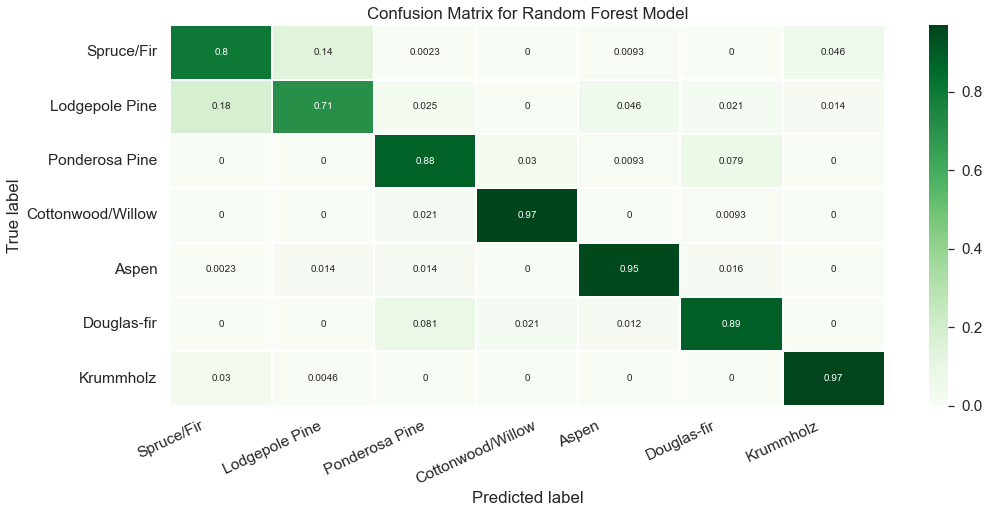

In [25]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_val_new, y_pred_test_forest)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 
               'Cottonwood/Willow', 'Aspen', 'Douglas-fir',    
               'Krummholz']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [26]:
print(classification_report(y_val_new, y_pred_test_forest))

              precision    recall  f1-score   support

           1       0.79      0.80      0.79       432
           2       0.81      0.71      0.76       432
           3       0.86      0.88      0.87       432
           4       0.95      0.97      0.96       432
           5       0.93      0.95      0.94       432
           6       0.88      0.89      0.88       432
           7       0.94      0.97      0.95       432

    accuracy                           0.88      3024
   macro avg       0.88      0.88      0.88      3024
weighted avg       0.88      0.88      0.88      3024



In [28]:
forest = RandomForestClassifier(n_estimators=20, random_state=37)
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(forest, X_train_new, y_train_new))))

Accuracy = 0.8539


<a id='7.4.1'></a>
### <font color=green> 7.4.1 Bagging <font>

In [31]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, 
                               bootstrap=True, n_jobs = 1)
bag_clf.fit(X_train_new, y_train_new)
y_pred = bag_clf.predict(X_val_new)
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(bag_clf, X_train_new, y_train_new))))

Accuracy = 0.7095


In [32]:
X = X_train_new
y = y_train_new
tree_1 = DecisionTreeClassifier(random_state=42)
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(tree_1, X, y))))

Accuracy = 0.7836


<a id='7.5'></a>
  ## <font color=green> 7.5. KNN  <font>
KNN is better on smaller dataset, however we will evaluate the performance of this model 

To find out the best value for k we will use a for loop, and with the range from 1 to 200 range (1,200,10). I reduced the range to 10 but will use iterations of 1. And it gives me the best K = 1. 

In [44]:
k_neighbors_list = range (1,100,1)

results_list = []

for k in k_neighbors_list:
    clf = KNeighborsClassifier(n_neighbors=k, p=2) # using manhattan_distance 
    clf.fit(X_train_new, y_train_new)
    y_pred_test = clf.predict(X_val_new)
    acc_k = accuracy_score(y_val_new, y_pred_test)
    
    results_list.append({
        "k": k,
        "acc": acc_k
    })
    
results = pd.DataFrame(results_list)

p = 1 (Manhatten Distance), the best k = 8 with accuracy= 0.759259
p = 2 (Euclidean Distance), the best k = 1 with accuracy = 0.761905

Checking the best value for K and accuracy 

In [45]:
test = results.sort_values('acc', ascending = False) 
test

,k,acc
0,1,0.772817
2,3,0.749339
3,4,0.742394
4,5,0.731812
5,6,0.723545
...,...,...
95,96,0.562500
92,93,0.561839
93,94,0.561508
97,98,0.559854


Text(0, 0.5, 'Testing Accuracy')

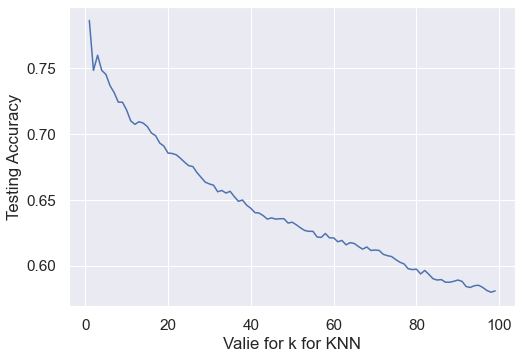

In [35]:
plt.plot(results['k'],results['acc'])
plt.xlabel('Valie for k for KNN')
plt.ylabel('Testing Accuracy')

In [36]:
k_neighbors_list = range (1,40,1)

K_scores = []

for k in k_neighbors_list:
    # Run KNeighborsClassifier with k neighbours 
    knn = KNeighborsClassifier(n_neighbors=k, p=1) # using manhattan_distance 
    # Obtain Cross_val_score for KneighborsClassifier with k neighbors 
    scores = cross_val_score(knn,X_train_new, y_train_new, cv= 5, scoring= "accuracy")
    # Append mean of scores for K neighbors to k_scores list 
    K_scores.append({
        "k": k,
        "acc": scores.mean
    })
    
results = pd.DataFrame(K_scores)

In [37]:
#test = results.sort_values(K_scores, ascending = False) 
#test

Using Grridsearch and cross validation we will adapt the model. <br>
We first create a KNN classifier instance and then prepare a range of values of hyperparameter K from 1 to 31 that will be used by GridSearchCV to find the best value of K.

Furthermore, we set our cross-validation batch sizes cv = 5 and set scoring metrics as accuracy as our preference.

In [40]:
cross_valid_scores = {}
parameters = {
    "n_neighbors": list(range(1,20,1)),
    "leaf_size":list(range(1,100,20)),
    "metric":["euclidean","manhattan"]    
}

model_KNN = KNeighborsClassifier()

model_KNN = GridSearchCV(
    model_KNN,
    parameters,
    cv=5,
    scoring = "accuracy"

)
KNN_results = model_KNN.fit(X_train_new, y_train_new)

In [41]:
KNN_results.best_score_
KNN_results.best_estimator_
KNN_results.best_params_

{'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 1}

In [42]:
accuracy = KNN_results.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 76.26%


In [43]:
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(model_KNN, X_train_new, y_train_new))))

KeyboardInterrupt: 

In [ ]:
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(model_KNN, X_val_new, y_val_new))))

Using the best model to calculate the mean cross validation score to compare the model later with each other

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1,leaf_size=1,metric='euclidean')

scores = cross_val_score(knn, X_train_new, y_train_new, cv = 10, scoring = "accuracy")

In [ ]:
print("Accuracy = {0:.4f}\n".format(accuracy_score(model_KNN.predict(X_val_new), y_val_new)))
print("Classification Report")
print(classification_report(model_KNN.predict(X_val_new), y_val_new))

In [ ]:
plot_confusion_matrix(model_KNN,X_val_new, y_val_new,cmap=plt.cm.Blues,values_format='d' )

In [ ]:
classifiers_compare = classifiers_compare.append({'Algorithm': "KNN", 'Mean CV Score':(scores.mean())},ignore_index=True)

kNN is simple to use and can return very accurate and meaningful results. It also has a tendency to be computationally expensive, so it may not be your best choice for larger datasets. 

<a id='7.6'></a>
## <font color=green> 7.6. SVM  <font>
The multiclass problem is broken down to multiple binary classification cases, which is also called one-vs-one. In scikit-learn one-vs-one is not default and needs to be selected explicitly (as can be seen further down in the code). One-vs-rest is set as default. It basically divides the data points in class x and rest. Consecutively a certain class is distinguished from all other classes.  The penalty term C is set to 1 for all classifiers. For the multiclass classification, the type one-versus-one is specified, as can be seen in decision_function_shape=’ovo’

In [ ]:
ovr_clf = OneVsRestClassifier(svm.SVC(C=10,kernel='rbf'))
ovr_clf.fit(X_train_new, y_train_new)
print("SVM Accuracy = {:.4f}".format(np.mean(cross_val_score(ovr_clf, X_train_new, y_train_new))))

The Model output is not very good, lets fine tune the SVM parameters to further improve the model performance. 
_C_ is the balance between margin violations (low C) or better generalization of the models. _Gamma_ acts like a regularization hyperparamter. If the model is overfitting it is advisable to redeuce it.If it is underfitting you should increase it. The best Kernel to use if the dataset is large is _Gaussoan RBF kernel_. Since we already used Polynominal in our dataset we will disregard this option. 

In [ ]:
model_to_set = OneVsRestClassifier(SVC(kernel="rbf"))

parameters = {
    "estimator__C": [1,10,100],
    "estimator__gamma":[0.01,0.0001,0.00001],
}

estimator = GridSearchCV(model_to_set, param_grid=parameters, cv=5, n_jobs=-1)

estimator.fit(X_train_new, y_train_new)

print(estimator.best_score_)
print (estimator.best_params_)

In [ ]:
print("The best parameters are %s with a score of %0.2f"
      % (estimator.best_params_, estimator.best_score_))


scores = estimator.cv_results_['mean_test_score'].reshape(len(parameters['estimator__C']), len(parameters['estimator__gamma']))

# Draw heatmap of the validation accuracy as a function of gamma and C

plt.figure(figsize=(5, 5))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.Blues)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(parameters['estimator__gamma'])), parameters['estimator__gamma'], rotation=45)
plt.yticks(np.arange(len(parameters['estimator__C'])), parameters['estimator__C'])
plt.title('Validation accuracy')
plt.show()

In [ ]:
final_model = estimator.best_estimator_
Y_pred = final_model.predict(X_val_new)
print("Training set score for SVM: %f" % final_model.score(X_train_new , y_train_new))
print("Testing  set score for SVM: %f" % final_model.score(X_val_new  , y_val_new ))

In [ ]:
scores = cross_val_score(final_model, X_train_new, y_train_new, cv = 10, scoring = "accuracy")

In [ ]:
print(classification_report(final_model.predict(X_val_new), y_val_new))

In [ ]:
plot_confusion_matrix(final_model,X_val_new, y_val_new,cmap=plt.cm.Blues,values_format='d' )

In [ ]:
classifiers_compare = classifiers_compare.append({'Algorithm': "SVM", 'Mean CV Score':(scores.mean())},ignore_index=True)

<a id='7.2'></a>
## <font color=green> 7.7. Naive Bayes  <font>

Since we have a classification problem with multiple discrete values we use the multinominal Naive Bayes method

In [ ]:
#Import Gaussian Naive Bayes model

#Import scikit-learn metrics module for accuracy calculation

#Create a Gaussian Classifier
mnb = BernoulliNB()

# Train the model using the training sets
mnb.fit(X_train_new,y_train_new)

#Predict Output
y_pred= mnb.predict(X_val_new)
scores = cross_val_score(mnb,X_train_new,y_train_new,cv = 5, scoring = "accuracy")
# Model Accuracy, how often is the classifier correct?
print("Mean Accuracy:",scores.mean())
print("Accuracy:",metrics.accuracy_score(y_val_new, y_pred))

classifiers_compare = classifiers_compare.append({'Algorithm': "Naive Bayes", 'Mean CV Score':(scores.mean())},ignore_index=True)

<a id='7.8'></a>
## <font color=green> 7.8. Logistic Regression <font>

In [ ]:
df_logist.shape

In [ ]:
y_train_new.shape

In [ ]:
y_train_log = y_train_log.values.ravel()
y_val_log = y_val_log.values.ravel()

In [ ]:
#Run Logistic Regression with only the New PCA reduced dataset provided & L1 Regularization
C_range=[0.001,0.01,0.02,0.04]
scores_logreg=[]
for c in C_range:
    #Saga is good for larger Datasets 
    logreg = LogisticRegression(C=c, penalty ='l1', solver='saga', multi_class='multinomial',max_iter=5000)
    logreg.fit(X_train_log, y_train_log)
    y_pred = logreg.predict(X_val_log)
    scores_logreg.append(metrics.accuracy_score(y_val_log,y_pred))

    
#Plot Logistic Regression with only the data provided
plt.plot(C_range,scores_logreg)
plt.xlabel("Values of Regularization Parameter")
plt.ylabel("Testing accuracy with Feature Engineering")
max(scores_logreg)

<a id='7.9'></a>
## <font color=green> 7.9. Ensemble methods<font>

__Voting Classifier__   

A very simple way to create an even better classifier is to aggregate the best predictions of each classifier and predict the class that gets the most votes. Normally this method is a better predictor than the single models.  

In [ ]:
eclf = VotingClassifier(estimators=[
    ('etc', etc_selected), ('knn',KNN_results),('xgboost',xgboost2)],voting='hard')
eclf.fit(X_train_new, y_train1)
y_val_pred = eclf.predict(X_val_new)
print("Accuracy achieved by ensembling",metrics.accuracy_score(y_val1,y_val_pred))

In [ ]:
classifiers_compare

<a id='8'></a>
#  <font color=darkgreen>8.ML Algorithms after Dimensionality Reduction </font>

<a id='8.1'></a>
## <font color=green> 8.1. PCA Dimensionality reduction<font>

Principal component analysis (PCA) as the transformation of any high number of variables into a smaller number of uncorrelated variables called principal components (PCs), developed to capture as much of the data’s variance as possible. Principle components capture most of the variance of the data. The first principle components hold the most variance in the data, Each subsequent PCS is orthogonal to the last and has a lesser variance. In this way, given a set of x correlated variables over y samples, you achieve a set of uncorrelated PCS over the same y samples. We are running it on the dataset where we have all seleted features and will use PCA to identify the most important features. For the visualization part we are using https://plotly.com/python/pca-visualization/. 

Using the first 2 principle components show that the data with 2 PCAs is very well deferiantiated. We are using all features to test it against the initial selected features from the previous models. 

With only two PCA you can nicely see how well the data is differentiated among the different Cover Types. 

In [ ]:
#Using a 2D Diagram for the two PCAs 
import plotly.express as px
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
#using the normalised dataset 
components = pca.fit_transform(X_train_new)

fig = px.scatter(components, x=0, y=1, color=y_train)
fig.show()

In [ ]:
# First we will observe with a 3D Diagram the first three PCAs

pca = PCA(n_components=3)
components = pca.fit_transform(X_train_new)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y_train_new,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [ ]:
# Run PCA that holds 95% of all variance of the data 
pca = PCA()
x_fit = pca.fit(X_train_new)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.98)+1

Looking at the two first PCA to see if these can explain the dataset.You can set the components to the ratio of variance you wish to preserve

In [ ]:
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Variance explained for each Principal Component", fontsize=20)
plt.plot(pca.explained_variance_ratio_, 'o-')
plt.xlabel("Principal Components", fontsize=16)
plt.ylabel("% of Variance", fontsize=16);

In [ ]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# of Principle Components", "y": "Cumulative Explained Variance"})

It is a bar chart where the height of each bar is the percentage of variance explained by the associated PC. 

In [ ]:
var = pca.explained_variance_[0:10] #percentage of variance explained
labels = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']

plt.figure(figsize=(10,7))
plt.bar(labels,var,color=['purple'])
plt.xlabel('Pricipal Component')
plt.ylabel('Proportion of Variance Explained')

On top of that, we can also look at the combinations of variables that created each principal component with pca. We could use a heat map to showcase the correlation betweem the PCAs between each other. 

In [ ]:
#Heatmap PCA
fig, ax = plt.subplots(figsize=(40,20)) 
col_name = ['x' + str(idx) for idx in range(0, X_train_new.shape[1])]

_ = sns.heatmap(pca.components_**2,
                 yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(col_name),
                 annot=True,
                 fmt='.1f',
                 square=True,
                 linewidths=0.05,
                 cbar_kws={"orientation": "horizontal"})

In [ ]:
pca_ratio = pca.explained_variance_ratio_
pca_ratio_tranposed = list(map(list, zip(*[pca_ratio])))
df = pd.DataFrame(data = np.array(pca_ratio_tranposed), columns = ['PCA Variance Explained'])
df['PCA Variance Explained Cumulative'] = df['PCA Variance Explained'].cumsum()
df.index += 1
df

Looks Like most variance (99.1%) is explained once we reach 12 principal components, so let’s create training and validation data sets using the first 12 principal components

In [ ]:
pca_mod = PCA(n_components=12)
PCA_X_train_final_selected = pca_mod.fit_transform(X_train_new)
PCA_X_val_final_selected = pca_mod.fit_transform(X_val_new)
print("Size of the dimensionality reduced training dataset", PCA_X_train_final_selected.shape)
print("Size of the dimensionality reduced training dataset", PCA_X_val_final_selected.shape)

In [ ]:
PCA_X_train_final_selected[0]

Check which most important features were selected using PCA. 

In [ ]:
pca_mod = PCA(n_components=12)

model = pca_mod.fit(X_train_new)
X_pc = model.transform(X_train_new) 

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

# get the names
most_important_names = [X_train_new.columns[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

In [ ]:
df


Let's use the pipeline to wrap everything together and to find the best configuration for the different hyper-parameters



In [ ]:
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()), ('LDA', LinearDiscriminantAnalysis())]) # Pipeline the entire process: Scale the data -> PCA -> LDA Classifier

n_components = list(range(1,19)) # We will try different numbers of principal components

#Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {"pca__n_components":n_components}

estimator = GridSearchCV(pipeline, param_grid, cv=5) # Create a grid search to try all the possible number of PCs
estimator.fit(X_train_new, y_train_new);

In [ ]:
# Get Test Scores Mean and std for each grid search
scores_mean = estimator.cv_results_['mean_test_score']
scores_mean = np.array(scores_mean)

scores_sd = estimator.cv_results_['std_test_score']
scores_sd = np.array(scores_sd)

# Plot Grid search scores
plt.figure(figsize=(10,10))
plt.plot(n_components, scores_mean, '-o')

plt.title("Grid Search Scores", fontsize=20, fontweight='bold')
plt.xlabel("Number of Principal Components", fontsize=16)
plt.ylabel('CV Average Score', fontsize=16)
plt.grid('on')

As can be seen in the graph, the optimal number of PCs to select will 12 as this gives us the optimal CV score. The optimum is 12 and increasing the number of features does not add much value. 

Source codes: https://www.kaggle.com/code/maniyar2jaimin/interactive-plotly-guide-to-pca-lda-t-sne, https://github.com/dasaditi/machineLearning/blob/master/forestCover/ForestCover.ipynb

<a id='8.1.1'></a>
## <font color=green> 8.1.1. Random Forest<font>

Fine tuning the model and checking the performance of the PCA method

In [ ]:
n_estimators = list(range(50, 250,5))
criterion=['gini','entropy']
# create a parameter grid: map the parameter names to the values that should be searched
param_grid_rf = dict(n_estimators=n_estimators,criterion=criterion)

# instantiate and fit the grid
rf = RandomForestClassifier()
grid_rf = RandomizedSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy' ,return_train_score=False)

grid_rf.fit(PCA_X_train_final_selected, y_train_new)

In [ ]:
#Mean cross-validated score of the best_estimator
print("The best score: ",grid_rf.best_score_.round(4))
#Parameter setting that gave the best results on the hold out data.
print("The best parameter: ",grid_rf.best_params_)

In [ ]:
rf_final = RandomForestClassifier(criterion=grid_rf.best_params_['criterion'],
                            n_estimators=grid_rf.best_params_['n_estimators'])
rf_final.fit(PCA_X_train_final_selected,y_train_new)
rf_score=rf_final.score(PCA_X_val_final_selected,y_val_new)

print("The accuracy score of the RandomForest with reduced feature set: ",round(rf_score,2))

With cross validation you can see it overfits the train data und the result of the validation data is lower

In [ ]:
print("Accuracy = {0:.4f}".format(np.mean(cross_val_score(rf_final, PCA_X_val_final_selected, y_val_new))))

As you can see the model is overitting on the Training Set and has a lower score on the cross validation score.

In [ ]:
#the plot learning curve from sklearn works only if you add the definition of sklearn 


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, 
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
cv = ShuffleSplit(n_splits=500, test_size=0.2, random_state=0)
title = "Learning Curves (Random Forest with PCA reduced dataset)"
plot_learning_curve(rf_final, title, PCA_X_train_final_selected, y_train_new, ylim=None, cv=cv,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

plt.show()


<a id='8.1.2'></a>
## <font color=green> 8.1.2 XGBoost<font>

In [ ]:
le = LabelEncoder()
y_train_PCA = le.fit_transform(y_train_new)
y_val_PCA = le.fit_transform(y_val_new)

In [ ]:
def xgb_grid_search(X,y,nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'max_depth': [10] , 'min_child_weight':[4,5,6] ,'learning_rate': [0.05,0.1,0.5] ,'n_estimators': [20,50,100] }
    # decision tree model
    xgb_model=XGBClassifier()
    #use gridsearch to test all values
    xgb_gscv = GridSearchCV(xgb_model, param_grid, cv=nfolds)
    #fit model to data
    xgb_gscv.fit(X, y)
    print(xgb_gscv.best_params_)
    print(xgb_gscv.best_estimator_)
    print(xgb_gscv.best_score_)

In [ ]:
xgb_grid_search(PCA_X_train_final_selected,y_train_PCA,3)

In [ ]:
xgb_model=XGBClassifier(max_depth=10,min_child_weight =5, n_estimators=100,learning_rate=0.5)
xgb = xgb_model.fit(PCA_X_train_final_selected,y_train_PCA)

In [ ]:
xgb_acc_sel =xgb.score(PCA_X_val_final_selected,y_val_PCA)
print("The accuracy score of the XGBoost with PCA reduced feature set: ",round(xgb_acc_sel,2))

<a id='8.1.3'></a>
## <font color=green> 8.1.3. Logistic Regression<font>

In [ ]:
#Run Logistic Regression with only the New PCA reduced dataset provided & L1 Regularization
C_range=[0.001,0.01,0.02,0.05,0.06,0.08,1,2,3,5,10]
scores_logreg=[]
for c in C_range:
    #Saga is good for larger Datasets 
    logreg = LogisticRegression(C=c, penalty ='l1', solver='saga', multi_class='multinomial',max_iter=5000)
    logreg.fit(PCA_X_train_final_selected, y_train_new)
    y_pred = logreg.predict(PCA_X_val_final_selected)
    scores_logreg.append(metrics.accuracy_score(y_val_new,y_pred))

    
#Plot Logistic Regression with only the data provided
plt.plot(C_range,scores_logreg)
plt.xlabel("Values of Regularization Parameter")
plt.ylabel("Testing accuracy with Feature Engineering")
max(scores_logreg)

In [ ]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
title = "Learning Curves Logistic Regression with PCA reduced dataset)"
plot_learning_curve(logreg, title, PCA_X_train_final_selected, y_train_new, ylim=None, cv=cv,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5))

<a id='8.1.4'></a>
## <font color=green> 8.1.4 Extra Trees Classifier <font>

In [ ]:
# Build a forest and compute the feature importances
n_estimators = list(range(50, 250,5))
criterion=['gini','entropy']
#min_samples_leaf = list(range(5, 25))
#min_samples_split = list(range(5, 25))
#max_depth = list(range(8, 50))
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_estimators=n_estimators, criterion=criterion)

forest = ExtraTreesClassifier(random_state=0)
grid_etc = RandomizedSearchCV(forest, param_grid, cv=5, scoring="accuracy" ,return_train_score=False)
grid_etc.fit(PCA_X_train_final_selected, y_train_new)
print("The best score: ",grid_etc.best_score_.round(4))
#Parameter setting that gave the best results on the hold out data.
print("The best parameter: ",grid_etc.best_params_)
grid_etc.best_estimator_

In [ ]:
 #Find Feature importance
etc_selected = ExtraTreesClassifier(n_estimators=grid_etc_selected.best_params_['n_estimators'],
                            criterion=grid_etc_selected.best_params_['criterion'],random_state=0)
etc_selected.fit(PCA_X_train_final_selected, y_train_new)
etc_sel_acc = etc_selected.score(PCA_X_val_final_selected, y_val_new)
print("The accuracy score of the ExtraTreesClassifier with the selected features: ",round(etc_sel_acc,2))

<a id='8.1.5'></a>
## <font color=green> 8.1.5 Ensemble Methods <font>

__Voting Classifier__   

A very simple way to create an even better classifier is to aggregate the best predictions of each classifier and predict the class that gets the most votes. Normally this method is a better predictor than the single models.  

In [ ]:
eclf = VotingClassifier(estimators=[
    ('etc', etc_selected), ('knn',KNN_results),('xgboost',xgboost2)],voting='hard')
eclf.fit(PCA_X_train_final_selected, y_train_PCA)
y_val_pred = eclf.predict(PCA_X_val_final_selected)
print("Accuracy achieved by ensembling",metrics.accuracy_score(PCA_X_val_final_selected, y_val_PCA))

<a id='8.2'></a>
## <font color=green> 8.2. Linear Discriminant Analysis (LDA)<font>


LDA, much like PCA is also a linear transformation method commonly used in dimensionality reduction tasks. However unlike the latter which is an unsupervised learning algorithm, LDA falls into the class of supervised learning methods. As such the goal of LDA is that with available information about class labels, LDA will seek to maximise the separation between the different classes by computing the component axes (linear discriminants ) which does this.

In [ ]:
lda = LDA(n_components=5)
# Taking in as second argument the Target as labels
X_LDA_2D = lda.fit_transform(X_train_new, y_train_new )

In [ ]:
# Create a classifier: a Fisher's LDA classifier
lda = LinearDiscriminantAnalysis(n_components=2)

# Train lda on the first half of the digits
X_LDA_2D = lda.fit_transform(X_train_new, y_train_new,)

In [ ]:
# To produce an interactive chart 
traceLDA = go.Scatter(
    x = X_LDA_2D[:,0],
    y = X_LDA_2D[:,1],
    name = '',
    mode = 'markers',
#     text = Target.unique(),
    showlegend = True,
    marker = dict(
        size = 8,
        color = y_train_new,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [traceLDA]

layout = dict(title = 'LDA (Linear Discriminant Analysis)',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= True
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

<a id='9'></a>
#  <font color=darkgreen>9.Final Submission </font>

pred=forest.predict(data_test.drop(labels=['Id','Wilderness','Soil'], axis=1))
 
 
 
submission=pd.DataFrame(data=pred,columns=['Cover_Type'])
submission
 
 
 
submission['Id']=data_test['Id']
submission